#  1) importing Dataset

In [20]:
# !pip install wordcloud
# from wordcloud import WordCloud,STOPWORDS

In [21]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [22]:
tweet_df = pd.read_csv('twitter_data.csv')

In [23]:
tweet_df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [24]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [25]:
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out... 

!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!! 

!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit 

!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny 

!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361; 



In [26]:
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+http\S+",'',tweet,flags= re.MULTILINE)
    tweet = re.sub(r'\@w+|\#','',tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet = re.sub(r'_','',tweet)
    tweet = re.sub(r'[0-9]','',tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
    return "".join(filtered_tweets)

In [27]:
tweet_df.tweet = tweet_df['tweet'].apply(data_processing)

In [28]:
tweet_df = tweet_df.drop_duplicates('tweet')

In [29]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data

In [30]:
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: lemmatizing(x))

In [31]:
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

rtmayasolovelywomanshouldntcomplaincleaninghouseampmanalwaystaketrash 

rtmleewboydatscoldtygadwnbadcuffindathoestplace 

rturkindofbranddawgrtsbabylifeeverfuckbitchstartcryconfusedshit 

rtcgandersonvivabasedlookliketranny 

rtshenikarobertsshithearmighttruemightfakerbitchtoldya 



In [32]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24662 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24662 non-null  int64 
 1   count               24662 non-null  int64 
 2   hate_speech         24662 non-null  int64 
 3   offensive_language  24662 non-null  int64 
 4   neither             24662 non-null  int64 
 5   class               24662 non-null  int64 
 6   tweet               24662 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.5+ MB


In [33]:
tweet_df['class'].value_counts()

1    19079
2     4157
0     1426
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

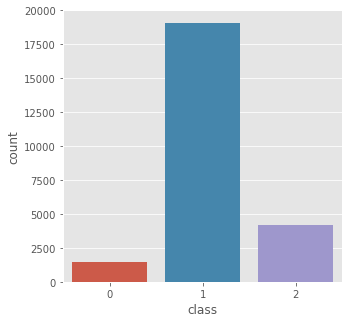

In [34]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='class', data=tweet_df)
# plot.show()

In [35]:
fig = plt.figure(figsize=(7,7))
colors= ("red","gold","green")
wp = {'linewidth':3,'edgecolor':"black"}
tags=tweet_df['class'].value_counts()
explode = (0.1,0.1)
tags.plot(kind='pie',autopct='%1.1f%%', shadow=True,colors=colors,startangle=90, wedgeprops=wp, explode=explode, class ='')
plot.title('Distribution of sentimentes')
plot.show()

SyntaxError: invalid syntax (1894496390.py, line 6)

In [ ]:
non_hate_tweets=tweet_df[tweet_df.hate_speech == 0]
# non_hate_tweets=tweet_df[tweet_df.class== 1]
non_hate_tweets.head()

In [38]:
# text = ''.join([word for word in non_hate_tweets['tweet']])
# plt.figure(figsize=(20,15),facecolor='None')
# wordcloud = WordCloud(max_words=500, width=1600,height=800).generate(text)
# plt.imshow( wordcloud, interpolaton="bilinear")
# # plt.imshow(WordCloud, interrplotlation='bilinear')
# plt.axis('off')
# plt.title('Most frequently words in non hate tweets', fontsize=19)
# plt.show()

In [ ]:
# vectorized
vect = TfidfVectorizer(ngram_range=(0,1)).fit(tweet_df['tweet'])

In [ ]:
# find the first 20 feature
# feature_names = vect.get_feature_names()
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

In [ ]:
vect = TfidfVectorizer(ngram_range=(0,2)).fit(tweet_df['tweet'])

In [ ]:
# feature
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

In [ ]:
# X train test
X = tweet_df['tweet']
Y = tweet_df['class']
X = vect.transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [ ]:
print("Size of x_train:",(x_train.shape))
print("Size of y_train:",(y_train.shape))
print("Size of x_test:",(x_test.shape))
print("Size of y_test:",(y_test.shape))

In [ ]:
# find tha accuracy
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict,y_test)
print("Test accuracy: {:.2f}%". format(logreg_acc*100))

In [ ]:
print(confusion_matrix(y_test, logreg_predict))
print("\n")
print(classification_report(y_test,logreg_predict))

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test,logreg_predict,labels=logreg.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = logreg.classes_)
disp.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
param_grid = {'C':[100,10,1.0,0.1,0.01],'solver':['newton-cg','lbfgs','liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(x_train, y_train)
print("Best Cross validation score:{:.2f}".format(grid.best_score_))
print("best parameters:", grid.best_params_)

In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred,y_test)
print("Test accuracy:{:.2f}%".format(logreg_acc*100))

In [ ]:
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))


# End project 